In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

#column names taken from http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
#.strip() removes any leading or trailing white spaces

columns=[]
for c in cols.split(','): 
  if(c.strip()):
    columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [6]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

#attack types taken from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

In [7]:
df=pd.read_csv('/content/drive/MyDrive/kddcup.data_10_percent_corrected',names=columns)

df['Attack type']=df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
df.shape

(494021, 43)

In [9]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [10]:
df['Attack type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack type, dtype: int64

In [11]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
val_col=df._get_numeric_data().columns
group_col=list(set(df.columns)-set(val_col))
group_col.remove('target')
group_col.remove('Attack type')

In [14]:
for c in group_col:
  print(c)

service
protocol_type
flag


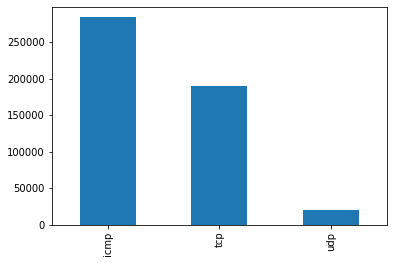

In [15]:
df['protocol_type'].value_counts().plot(kind='bar',x='Protocol type')

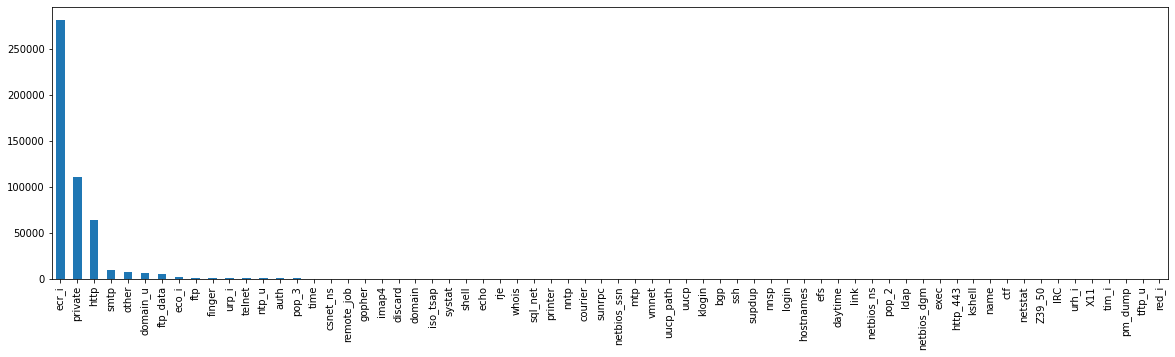

In [16]:
plt.figure(figsize=(20,5))
df['service'].value_counts().plot(kind='bar',x='Service')

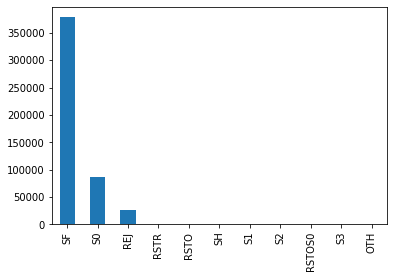

In [17]:
df['flag'].value_counts().plot(kind='bar',x='Flag')

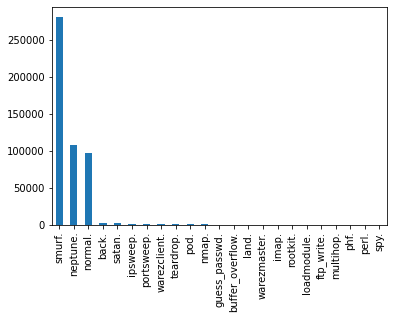

In [18]:
df['target'].value_counts().plot(kind='bar',x='Target')

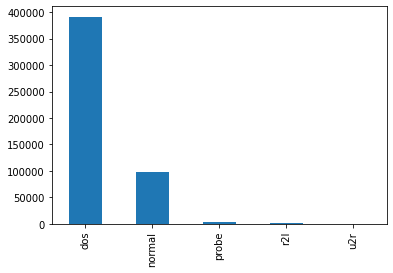

In [19]:
df['Attack type'].value_counts().plot(kind='bar',x='Attack type')

In [20]:
df.dropna('columns')

<ipython-input-20-c43341af83cb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df.dropna('columns')


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [21]:
df=df[[col for col in df if df[col].nunique()>1]]

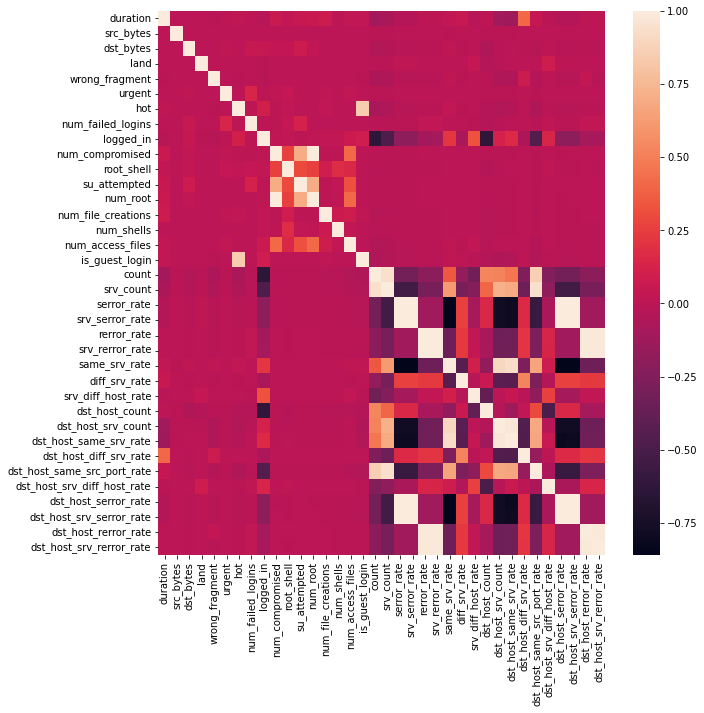

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [23]:
df.drop('num_root',axis=1,inplace=True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

#Removing the highly correlated values to ignore them for analysis

In [24]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [25]:
protocol_types={'icmp':0,'tcp':1,'udp':2}
df['protocol_type']=df['protocol_type'].map(protocol_types)

In [26]:
flag_types={'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag']=df['flag'].map(flag_types)

In [27]:
df.drop('service',axis=1,inplace=True)

In [28]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [29]:
df.drop('target',axis=1,inplace=True)

In [30]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [31]:
Y=df['Attack type']
X=df.drop('Attack type',axis=1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [33]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=69)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994,) (163027,)


In [35]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train, Y_train)

Y_test_pred1 = model1.predict(X_test)

print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score is: 0.9934560747324724
Test score is: 0.9937310997564821


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def fun():
    model = Sequential()
    
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
  
    model.add(Dense(8,activation='relu',kernel_initializer='random_uniform'))
    
    model.add(Dense(5,activation='softmax'))
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

model3 = KerasClassifier(build_fn=fun,epochs=50,batch_size=64)

model3.fit(X_train, Y_train.values.ravel())

Y_train_pred3 = model3.predict(X_train)
Y_test_pred3 = model3.predict(X_test)

print("Train score is:", accuracy_score(Y_train,Y_train_pred3))
print("Test score is:", accuracy_score(Y_test,Y_test_pred3))

<ipython-input-36-732805564dbd>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn=fun,epochs=50,batch_size=64)


Epoch 1/50
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0673 - accuracy: 0.9848
Epoch 2/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 3/50
5172/5172 [==============================] - 11s 2ms/step - loss: 0.0069 - accuracy: 0.9983
Epoch 4/50
5172/5172 [==============================] - 11s 2ms/step - loss: 0.0058 - accuracy: 0.9985
Epoch 5/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 6/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 7/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 8/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 9/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 10/50
5172/5172 [==============================] - 9s 2ms/step - loss: 0.

In [ ]:
from sklearn.svm import SVC

model2 = SVC(gamma='scale')

model2.fit(X_train, Y_train.values.ravel())
Y_test_pred2 = model2.predict(X_test)

print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:", model2.score(X_test,Y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, Y_train)

Test_Y_pred4 = model4.predict(X_test)

print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:",model4.score(X_test,Test_Y_Pred4))